# Names

- Sarah He
- Hao Zhang
- Kevin Zhang

# Research Question
What trends are present in San Diego crimes and where are these crimes located?

# Hypothesis

We hypothesize that most crimes will occur in highly populated areas and will be reported duing the day when most people are awake.

# Data overview

- Dataset
  - Dataset Name: Police NIBRS Crime Offenses 
  - Link to the dataset: https://data.sandiego.gov/datasets/police-nibrs/ 
  - Number of observations: We have observations from January 2020 - June 2024.
  - Number of variables: 31 objectid (Integer), nibrs_uniq (String), case_number (String), occurred_on (String), approved_on (String), day_of_week (Integer), month (Integer), year (Integer), code_section (String), group_type (String), ibr_category (String), crime_against (String), ibr_offense (String), ibr_offense_description (String), pd_offense_category (String), violent_crime (Integer), property_crime (Integer), beat (Integer), neighborhood (String), service_area (Integer), division_number (Integer), division (String), block_addr (String), city (String), state (String), zip (String),  query_run_date (String), geocode_status(String), geocode_score (Float), latitude (Float), longitude (Float) 
  - Dataset contains Crime Offense Data extracted from the San Diego Police Department's Records Management System and includes information such as the date and time of the reported offense, offense category, underlying code sections, and the block address of where the incident occurred. 

In [1]:
import pandas as pd
from zipfile import ZipFile
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Opening the zip file and extracting the dataset
ZipFile("pd_nibrs_datasd.csv.zip").extractall()

#Read the dataset into a DataFrame
df = pd.read_csv('pd_nibrs_datasd.csv', low_memory=False)

#Create a new DataFrame keeping only the relevant data
crimes_df = df[['case_number', 'occured_on', 'pd_offense_category', 'neighborhood', 'division', 'city', 'latitude', 'longitude']]

#Exclude data where pd_offense_cateogory is equal to 'All Other Offenses'
crimes_df = crimes_df[crimes_df['pd_offense_category'] != 'All Other Offenses']

#Function to convert the occurred_on column to integers
def get_hour(time):
    return int(time[11:13])

#Applying the function to the DataFrame
crimes_df['hour of day'] = crimes_df['occured_on'].apply(get_hour)

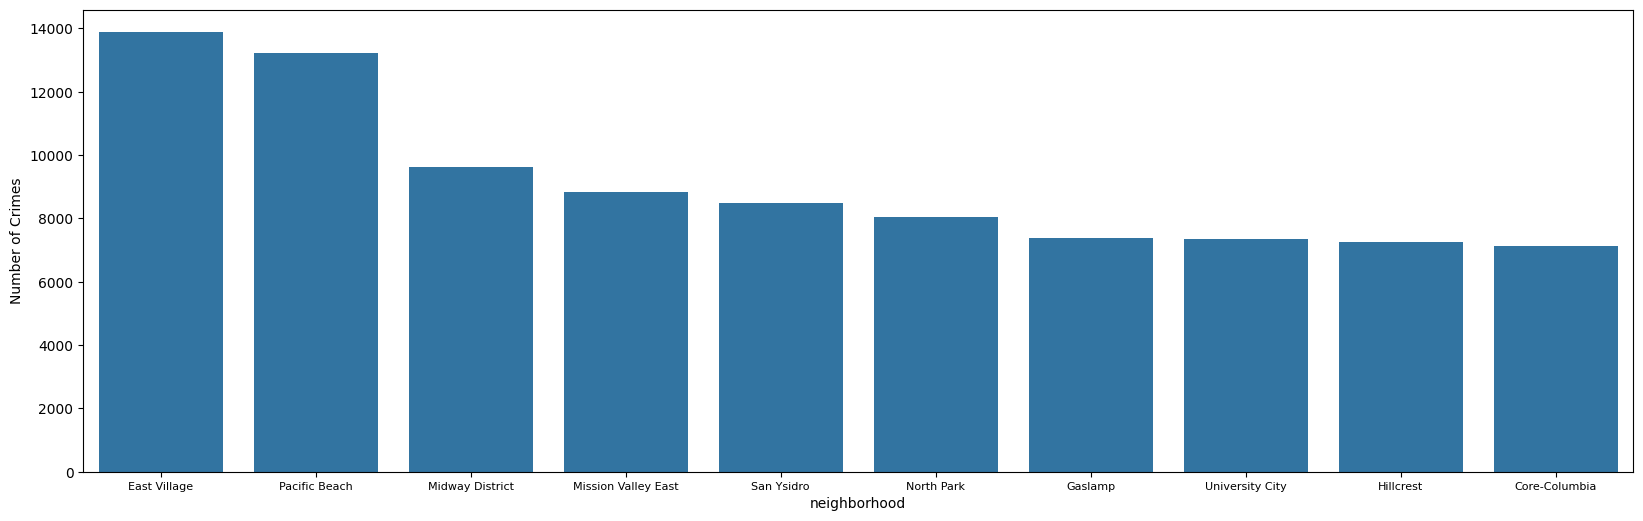

In [3]:
#Create a new DataFrame gropuped by neighborhoods and the number of crimes for each
neighborhood_df = crimes_df.groupby('neighborhood').count().sort_values(by='case_number', ascending=False).rename(columns={'case_number':'Number of Crimes'})[0:10]

#Create a bar plot to illustrate the counts for each neighborhood
plt.figure(figsize = (20, 6))
sns.barplot(data = neighborhood_df, x = neighborhood_df.index, y = 'Number of Crimes')
plt.xticks(fontsize=8) 
plt.show()

We found that neighborhoods like East Village, Pacific Beach, and the Midway District had the most crime occurrences. This makes sense since these areas are the most densely populated in San Diego. 

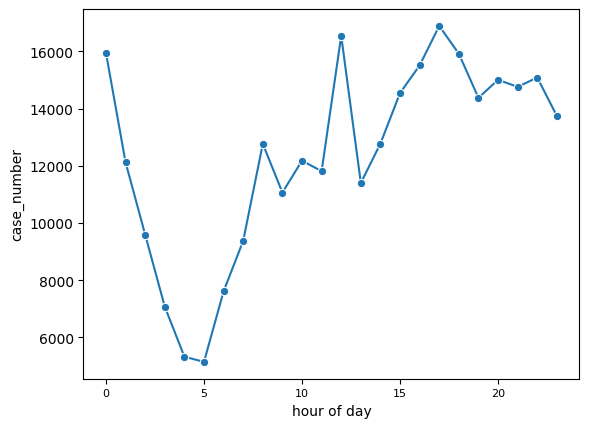

In [4]:
#Create a new DataFrame grouped by the hour of the day
time_df = crimes_df.groupby('hour of day').count()

#Create a lineplot to display the amount of crimes for each hour of the day
sns.lineplot(data = time_df, x = time_df.index, y = 'case_number', marker='o')
plt.xticks(fontsize=8) 
plt.show()

We found that most crimes happened during the afternoon and continued into the evening. This is due to the fact that more people are awake and outside to witness and report the crimes.

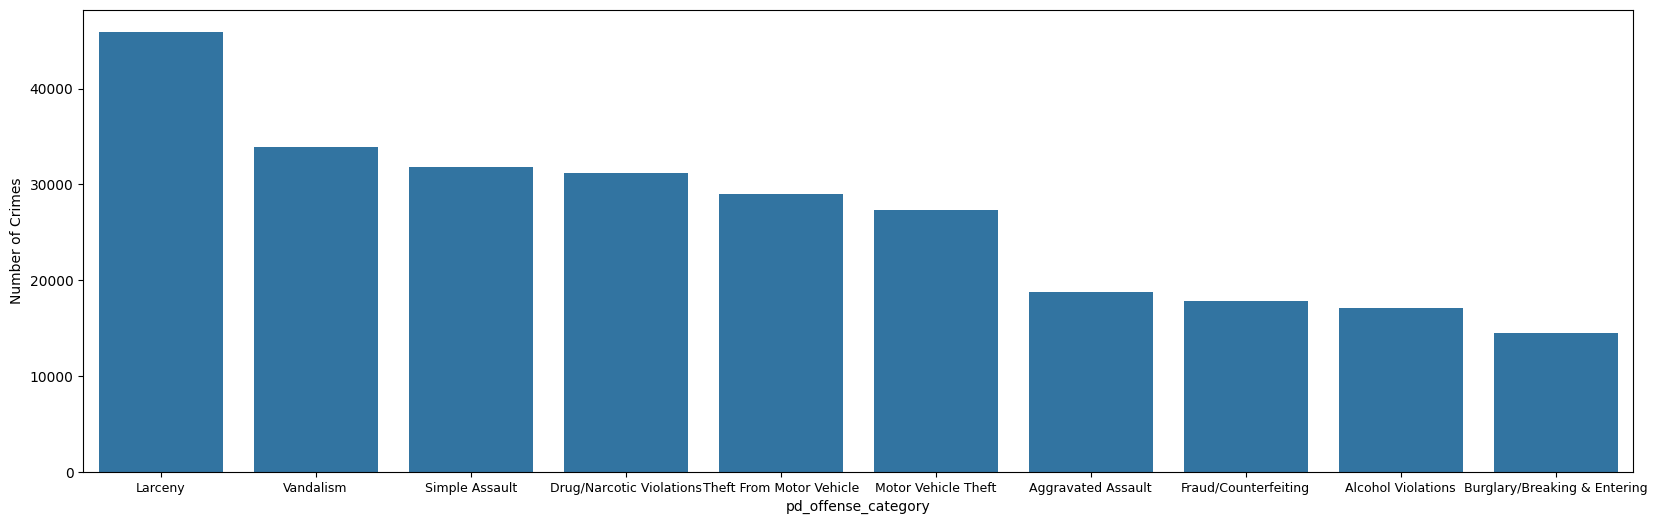

In [5]:
#Create a new DataFrame grouped by the pd_offense_category to get the total amount of cases for each category
types_df =  crimes_df.groupby('pd_offense_category').count().sort_values(by='case_number', ascending=False).rename(columns={'case_number':'Number of Crimes'})[0:10]

#Ceate a barplot to visualize the amount cases for each category
plt.figure(figsize = (20, 6))
sns.barplot(data = types_df, x = types_df.index, y = 'Number of Crimes')
plt.xticks(fontsize=9)
plt.show()

We found that larceny and vandalism were the most common types of crimes followed by simple assault and drug violations. 


# Conclusion 
We found a higher proportion of crimes occur in areas that get more foot traffic such as East Village that is closer to downtown. Furthermore, we also 